In [115]:
import torch
from matplotlib import pyplot as plt
from torch import Tensor

torch.set_printoptions(threshold=10, linewidth=128)  # for printing

In [116]:
MAX = 100
x = torch.linspace(0, 10, steps=MAX, dtype=float)
print(x.shape, x)

torch.Size([100]) tensor([ 0.0000,  0.1010,  0.2020,  ...,  9.7980,  9.8990, 10.0000], dtype=torch.float64)


In [117]:
y = 10 * x + torch.randint(-10, 10, (MAX,))
print(y.shape, y)

torch.Size([100]) tensor([ -3.0000,   5.0101,  10.0202,  ...,  91.9798,  97.9899, 107.0000], dtype=torch.float64)


$ y = wx + b $

In [118]:
class LinearRegession(torch.nn.Module):
    w: Tensor
    b: Tensor

    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.tensor(5.))
        print(f"Init w : {self.w.shape}, {self.w}")

        self.b = torch.nn.Parameter(torch.tensor(1.))
        print(f"Init b : {self.b.shape}, {self.b}")

    def forward(self, x):
        return self.w * x + self.b


model = LinearRegession()

Init w : torch.Size([]), Parameter containing:
tensor(5., requires_grad=True)
Init b : torch.Size([]), Parameter containing:
tensor(1., requires_grad=True)


In [119]:
def cost_fn(input: Tensor, target: Tensor) -> Tensor:
    return torch.sum((target - input) ** 2) / len(target)

   0 : cost = 836.1601683501682
  10 : cost = 225.4574680301491
  20 : cost = 77.74258865459285
  30 : cost = 42.01305756707017
  40 : cost = 33.37011946041214
  50 : cost = 31.27875606156316
  60 : cost = 30.772064889569243
  70 : cost = 30.648690703332576
  80 : cost = 30.61802960028863
  90 : cost = 30.609805959912336
 100 : cost = 30.607014929204023


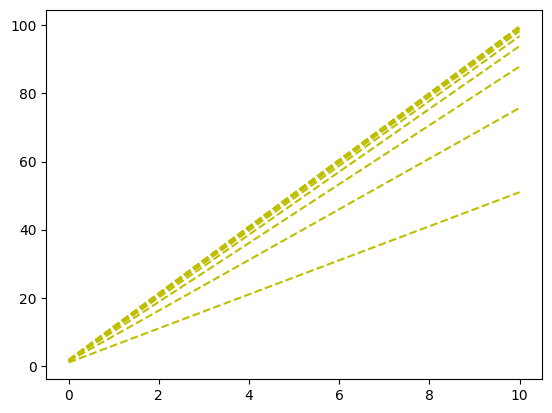

In [120]:
lr = 0.001
for e in range(101):
    y_pred = model(x)
    cost = cost_fn(y_pred, y)

    model.zero_grad()
    cost.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

    if not e % 10:
        print(f"{e:4} : cost = {cost}")
        plt.plot(x.tolist(), y_pred.tolist(), '--y', label=f"epoch {e}")

In [121]:
# plt.subplot(211)
# plt.plot(x, y, 'oc')
# plt.plot(x, hypothesis(x), 'r')
# plt.xlabel('x axis')
# plt.ylabel('y axis')

In [122]:
# plt.subplot(212)
# plt.plot(costs)
# plt.xlabel('epoch')
# plt.ylabel('cost')